# Vector Autoregression (VAR) model for multivariate time series forecasting

/var/folders/vs/03bk43jj4jn9ptfvw49_hbv80000gn/T/ipykernel_19270/1367118678.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('Year').sum()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


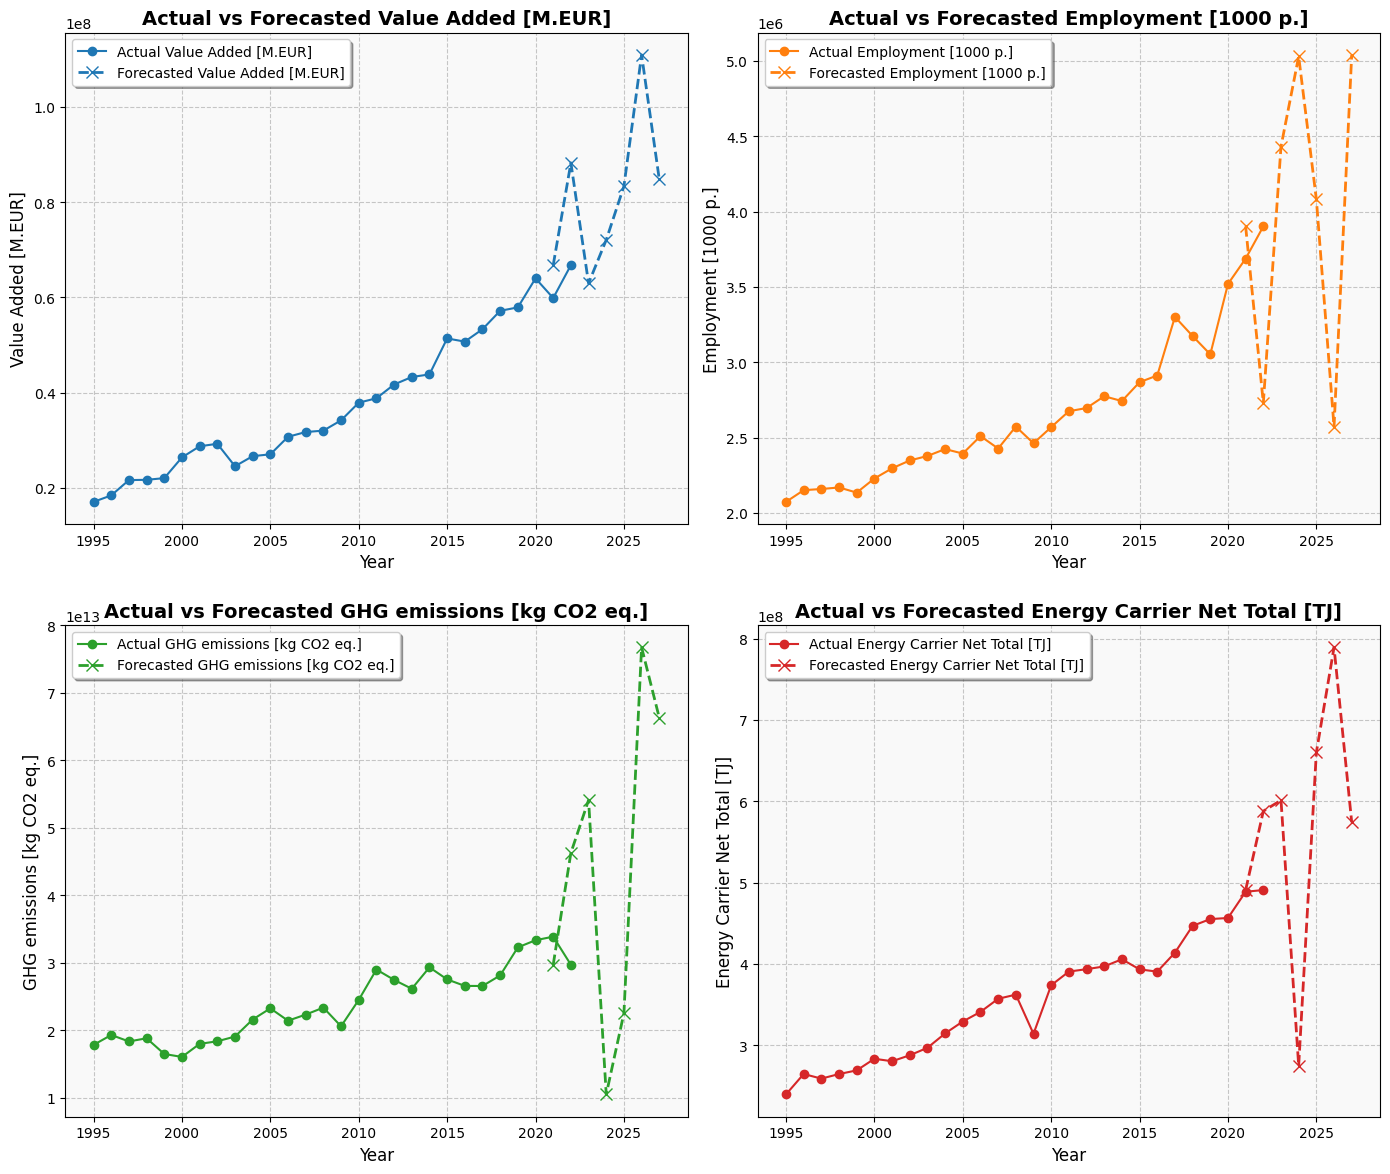

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Load your dataset 
# data = pd.read_csv('dataset.csv') 
data = pd.read_csv('ExioML_factor_accounting_IxI.csv')


# Step 1: Group by 'Year' and sum numeric columns
grouped_data = data.groupby('Year').sum()

# Step 2: Fit a VAR model without normalization (use the raw data directly)
model = VAR(grouped_data)
model_fitted = model.fit(maxlags=5)  # Fit the model and select lags automatically

# Step 3: Forecasting
lag_order = model_fitted.k_ar

# Use the last 'n' observations where n is lag_order and take the last observation - 1
last_observations = grouped_data.values[-(lag_order+1):-1]

# Forecast the next 7 periods, adjusting to start at 2021
forecast_steps = 7
forecast_values = model_fitted.forecast(last_observations, steps=forecast_steps)

# Create a new forecast index starting from 2021
forecast_index = [2021 + i for i in range(forecast_steps)]
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=grouped_data.columns)

# Step 4: Plotting each feature in a separate chart
features = ['Value Added [M.EUR]', 'Employment [1000 p.]', 'GHG emissions [kg CO2 eq.]', 'Energy Carrier Net Total [TJ]']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Color palette for lines

plt.figure(figsize=(14, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    
    # Plot actual values
    plt.plot(grouped_data.index, grouped_data[feature], label=f'Actual {feature}', color=colors[i], marker='o', markersize=6)
    
    # Plot forecasted values
    plt.plot(forecast_df.index, forecast_df[feature], '--', label=f'Forecasted {feature}', color=colors[i], linewidth=2, marker='x', markersize=8)

    # Customize the plot
    plt.title(f'Actual vs Forecasted {feature}', fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'{feature}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add legend
    plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)
    plt.gca().set_facecolor('#f9f9f9')  # Set a light background for the plot

plt.tight_layout()  # Adjust layout to prevent overlapping of plots
plt.show()

In [11]:
forecast_df = forecast_df.drop('Unnamed: 0',axis=1)

In [15]:
forecast_df.to_csv('forecast_df.csv')

In [12]:
# forecast_df.reset_index()
forecast_df

,Value Added [M.EUR],Employment [1000 p.],GHG emissions [kg CO2 eq.],Energy Carrier Net Total [TJ]
2021,6.678061e+07,3.901480e+06,2.971499e+13,4.909528e+08
2022,8.826060e+07,2.729387e+06,4.628710e+13,5.880455e+08
2023,6.297386e+07,4.431794e+06,5.410493e+13,6.014664e+08
2024,7.209242e+07,5.029977e+06,1.051104e+13,2.748682e+08
2025,8.334917e+07,4.081255e+06,2.253626e+13,6.603187e+08
2026,1.109298e+08,2.571382e+06,7.674274e+13,7.895679e+08
2027,8.479684e+07,5.040327e+06,6.631084e+13,5.744233e+08


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
# Select only the numerical columns (excluding 'Date')
numerical_columns = ['Value Added [M.EUR]', 'Employment [1000 p.]',
       'GHG emissions [kg CO2 eq.]', 'Energy Carrier Net Total [TJ]']
forecast_df[numerical_columns] = scaler.fit_transform(forecast_df[numerical_columns])

# Display the scaled DataFrame
forecast_df

,Value Added [M.EUR],Employment [1000 p.],GHG emissions [kg CO2 eq.],Energy Carrier Net Total [TJ]
2021,0.079380,0.538731,0.289951,0.419827
2022,0.527291,0.063997,0.540165,0.608466
2023,0.000000,0.753525,0.658203,0.634541
2024,0.190145,0.995808,0.000000,0.000000
2025,0.424875,0.611546,0.181563,0.748884
2026,1.000000,0.000000,1.000000,1.000000
2027,0.455063,1.000000,0.842494,0.582000


/var/folders/vs/03bk43jj4jn9ptfvw49_hbv80000gn/T/ipykernel_19622/2218547313.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('Year').sum()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


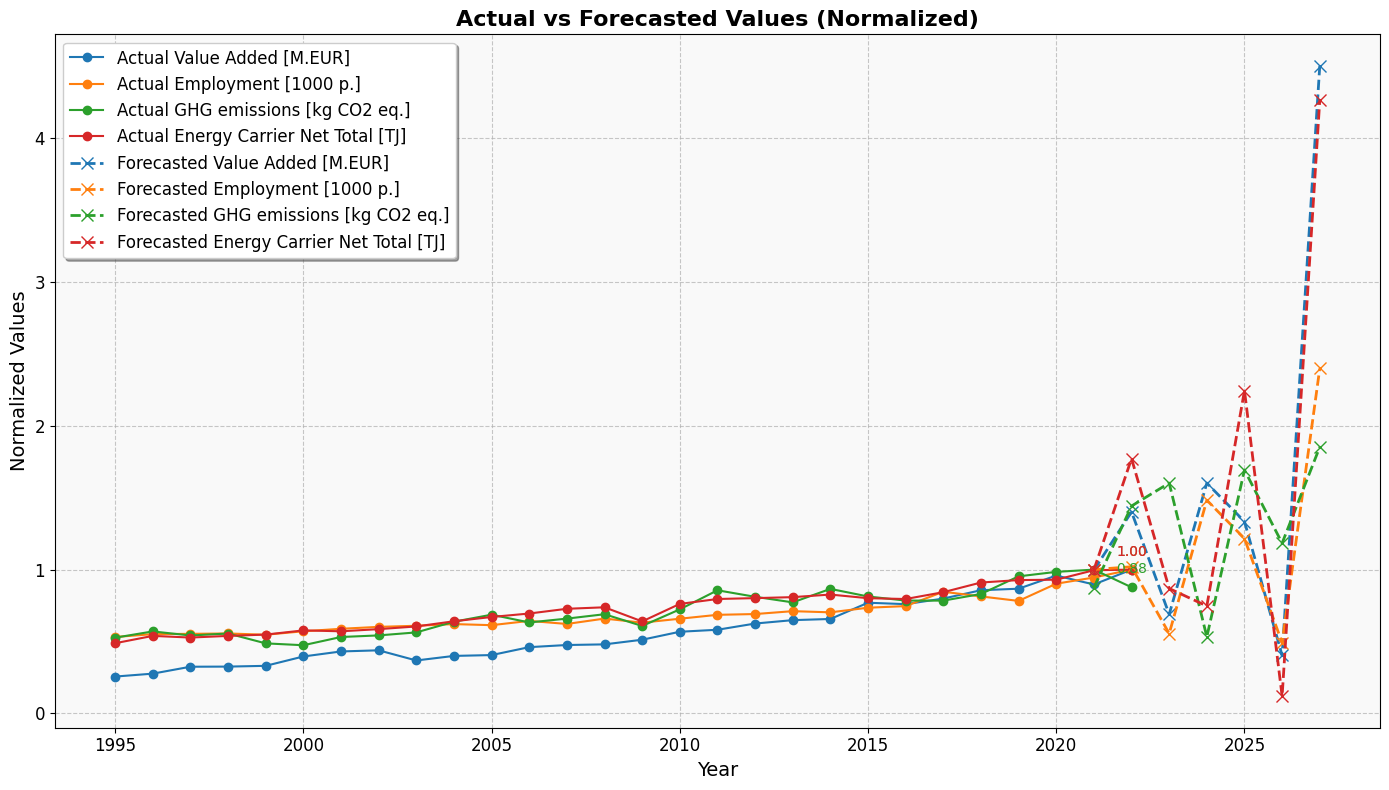

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

data = pd.read_csv('ExioML_factor_accounting_IxI.csv')
data = data.drop(columns={data.columns[0]})

# Step 1: Group by 'Year' and sum numeric columns
grouped_data = data.groupby('Year').sum()

# Step 2: Normalize the data
normalized_data = grouped_data / grouped_data.max()

# Step 3: Fit a VAR model
model = VAR(normalized_data)
model_fitted = model.fit(maxlags=5)  # Fit the model and select lags automatically

# Step 4: Forecasting
lag_order = model_fitted.k_ar  

# Use the last 'n' observations where n is lag_order and take the last observation - 1
last_observations = normalized_data.values[-(lag_order + 1):-1]

# Forecast the next 7 periods, adjusting to start at 2021
forecast_steps = 7
forecast_values = model_fitted.forecast(last_observations, steps=forecast_steps)

# Create a new forecast index starting from 2021
forecast_index = [2021 + i for i in range(forecast_steps)]
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=normalized_data.columns)

# Step 5: Plot the actual and forecasted values
plt.figure(figsize=(14, 8))

# Plot actual normalized values
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Color palette for lines
for i, column in enumerate(normalized_data.columns):
    plt.plot(normalized_data.index, normalized_data[column], label=f'Actual {column}', color=colors[i], marker='o', markersize=6)

# Plot forecasted values
for i, column in enumerate(forecast_df.columns):
    plt.plot(forecast_df.index, forecast_df[column], '--', label=f'Forecasted {column}', color=colors[i], linewidth=2, marker='x', markersize=8)

# Customize the plot
plt.title('Actual vs Forecasted Values (Normalized)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Improve the legend
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)
plt.gca().set_facecolor('#f9f9f9')  # Set a light background for the plot

# Add annotations for last actual values
for i, column in enumerate(normalized_data.columns):
    last_actual = normalized_data[column].iloc[-1]
    forecasted_first = forecast_df[column].iloc[0]
    plt.annotate(f'{last_actual:.2f}', 
                 (normalized_data.index[-1], last_actual), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color=colors[i])

# Show the plot
plt.tight_layout()
plt.show()